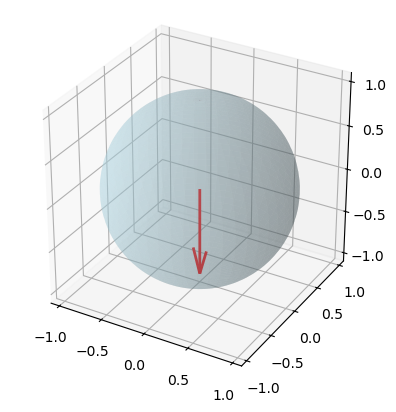

MovieWriter ffmpeg unavailable; using Pillow instead.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Charger les données de simulation (assure-toi que ces arrays sont disponibles)
time = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=0)  # Colonne du temps
theta = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=1)  # Colonne theta
phi = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=2)  # Colonne phi

n_frames = len(time)  # Nombre de pas de temps

# Conversion sphériques -> cartésiennes
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Préparation de la figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1])
ax.set_box_aspect([1, 1, 1])

# Ajout d'une sphère pour guider l'animation
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones_like(u), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='lightblue', alpha=0.3)

# Initialisation de la flèche (vecteur)
arrow = ax.quiver(0, 0, 0, x[0], y[0], z[0], color='red', linewidth=2)

# Fonction de mise à jour de l'animation
def update(frame):
    arrow.set_segments([[[0, 0, 0], [x[frame], y[frame], z[frame]]]])
    return arrow,

# Création de l'animation
anim = FuncAnimation(fig, update, frames=n_frames, interval=50, blit=False)

# Affichage
plt.show()

# Sauvegarde de l'animation
anim.save("precession_arrow.gif", writer="ffmpeg", fps=60)

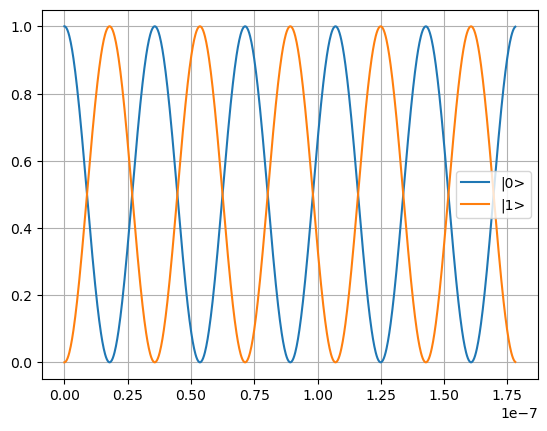

In [52]:
# Affichage des probabilités de |0> et |1> :

import numpy as np
import matplotlib.pyplot as plt

time = np.loadtxt("dynamic_data.csv", delimiter=" ", skiprows=1, usecols=0)
#theta = np.loadtxt("dynamic_data.csv", delimiter=" ", skiprows=1, usecols=1)
#phi = np.loadtxt("dynamic_data.csv", delimiter=" ", skiprows=1, usecols=2)
P1 = np.loadtxt("dynamic_data.csv", delimiter=" ", skiprows=1, usecols=3)  # Colonne proba de |0> , abs(alpha)
P2 = np.loadtxt("dynamic_data.csv", delimiter=" ", skiprows=1, usecols=4)  # Colonne probab de |1> , abs(beta)

plt.plot(time , P1 , label="|0>")
plt.plot(time , P2 , label="|1>")
plt.grid()
plt.legend()
plt.show()

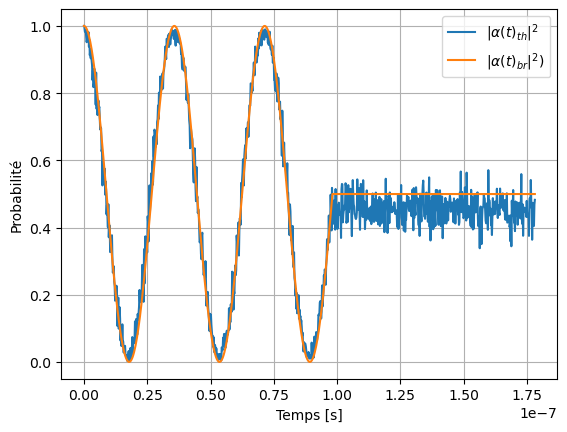

In [ ]:
# Affichage des probabilités de |0> et |1> :

import numpy as np
import matplotlib.pyplot as plt

time = np.loadtxt("oscillating_magnetic_field_with_noise_and_correction.csv", delimiter=" ", skiprows=1, usecols=0)
#theta = np.loadtxt("dynamic_data.csv", delimiter=" ", skiprows=1, usecols=1)
#phi = np.loadtxt("dynamic_data.csv", delimiter=" ", skiprows=1, usecols=2)
P1 = np.loadtxt("oscillating_magnetic_field_with_noise_and_correction.csv", delimiter=" ", skiprows=1, usecols=3)  # Colonne proba de |0> , abs(alpha)
P2 = np.loadtxt("oscillating_magnetic_field_with_noise_and_correction.csv", delimiter=" ", skiprows=1, usecols=4)  # Colonne probab de |1> , abs(beta)

P11 = np.loadtxt("preparation_qubit.csv", delimiter=" ", skiprows=1, usecols=3)  # Colonne proba de |0> , abs(alpha)
P22 = np.loadtxt("preparation_qubit.csv", delimiter=" ", skiprows=1, usecols=4)  # Colonne probab de |1> , abs(beta)

plt.plot(time , P1 , label=r'$|{\alpha}(t)_{th}|^2$' )
plt.plot(time , P11 , label=r'$|{\alpha}(t)_{br}|^2$)')
plt.xlabel("Temps [s]")
plt.ylabel("Probabilité")
plt.grid()
plt.legend()
plt.show()